##### Finance and Optimization

- Let's get started with some basic optimization problem and then scale it up!
- Click -> [tutorial](https://www.youtube.com/watch?v=cXHvC_FGx24&t=40s&frags=pl%2Cwn) to see where I got the problem from.

Tools for the job
- Numpy
- SciPy

- $min: x_1 x_4 (x_1+x_2+x_3)+x_3 $
- $s.t. x_1x_2x_3x_4 \geq 25$ 
- $x_1^2 + x_2^2 + x_3^2 + x_4^2 =40 $
- $1 \leq x_1,x_2,x_3,x_4 \leq 5$
- $x_0 = (1,5,5,1)$ where $x_0 = (x_1,x_2,x_3,x_4)$

We have several constraints here so let's translate them into python

In [1]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def goal(x):
    #x is a vector
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3) + x3 # This is our original objective

To change our original constraint
- $ x_1x_2x_3x_4 \geq 25$ to
- $x_1x_2x_3x_4-25 \geq 0 $
- $x_1^2 + x_2^2 + x_3^2 + x_4^2 =40 $ to
- $x_1^2 + x_2^2 + x_3^2 + x_4^2 -40 = 0 $

In [3]:
def constraint_1(x):
    return x[0]* x[1]*x[2]*x[3] - 25
def constraint_2(x):
    const_sum = 40
    for i in range(4):
        const_sum =  const_sum - x[i]**2
    return const_sum

In [4]:
x_0 = [1,5,5,1]
print(goal(x_0))

16


In [5]:
# Time to set up constraints
bound = (1,5)
bounds = (bound,bound,bound,bound)
const_1 = {'type':'ineq','fun':constraint_1}
const_2 = {'type':'eq','fun':constraint_2}
const = [const_1,const_2]

In [17]:
solution = minimize(goal, x_0, method='SLSQP',
                   bounds = bounds, constraints= const)

In [18]:
print(solution)

     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])


In [8]:
solution.x

array([1.        , 4.7429961 , 3.82115462, 1.37940765])

#### Basic financial ratios and calculation

In [28]:
import quandl
import pandas as pd
import datetime
import plotly_express as px

In [16]:
start = datetime.datetime(2007,1,1)
end = datetime.datetime(2012,12,31)

In [21]:
stock_list = pd.read_csv('https://datahub.io/core/s-and-p-500-companies/r/constituents.csv')

In [22]:
stock_list.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [32]:
px.bar(data_frame=stock_list, x='Sector')

In [50]:
telcom = stock_list[stock_list.Sector == 'Telecommunication Services']

In [37]:
def get_data(x):
    return quandl.get("WIKI/" + x, start_date= start,end_date = end)

In [51]:
telcom

,Symbol,Name,Sector
58,T,AT&T Inc.,Telecommunication Services
100,CTL,CenturyLink Inc,Telecommunication Services
474,VZ,Verizon Communications,Telecommunication Services


,Symbol,Name,Sector
58,T,AT&T Inc.,Telecommunication Services
100,CTL,CenturyLink Inc,Telecommunication Services
474,VZ,Verizon Communications,Telecommunication Services


In [54]:
telcom_data = {}
for i in telcom['Symbol']:
    telcom_data[i] = get_data(i)
    

In [55]:
telcom_data.keys()

dict_keys(['T', 'CTL', 'VZ'])

In [65]:
df = telcom_data['VZ']

In [66]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-01-03,37.63,38.49,37.61,37.82,21445800.0,0.000,1.0,20.654665,21.126709,20.643687,20.758954,21445800.0
2007-01-04,38.02,38.09,37.68,38.03,19215800.0,0.000,1.0,20.868731,20.907153,20.682109,20.874220,19215800.0
2007-01-05,38.03,38.06,37.32,37.38,19047000.0,0.000,1.0,20.874220,20.890687,20.484509,20.517443,19047000.0
2007-01-08,36.95,37.04,36.59,36.81,20370800.0,0.405,1.0,20.504566,20.554509,20.304792,20.426876,20370800.0
2007-01-09,36.81,37.25,36.81,36.96,16281300.0,0.000,1.0,20.426876,20.671044,20.426876,20.510115,16281300.0


In [84]:
df = telcom_data['T'][['Close']].reindex()

In [91]:
stocks = pd.DataFrame({'ATT':telcom_data['T']['Close'],
                      'CenturyLink':telcom_data['CTL']['Close'],
                     'Verizon':telcom_data['VZ']['Close']})

In [92]:
stocks.head()

,ATT,CenturyLink,Verizon
Date,,,
2007-01-03,34.95,43.73,37.82
2007-01-04,34.50,43.70,38.03
2007-01-05,33.96,43.65,37.38
2007-01-08,33.81,43.40,36.81
2007-01-09,33.94,43.21,36.96


Populating the interactive namespace from numpy and matplotlib


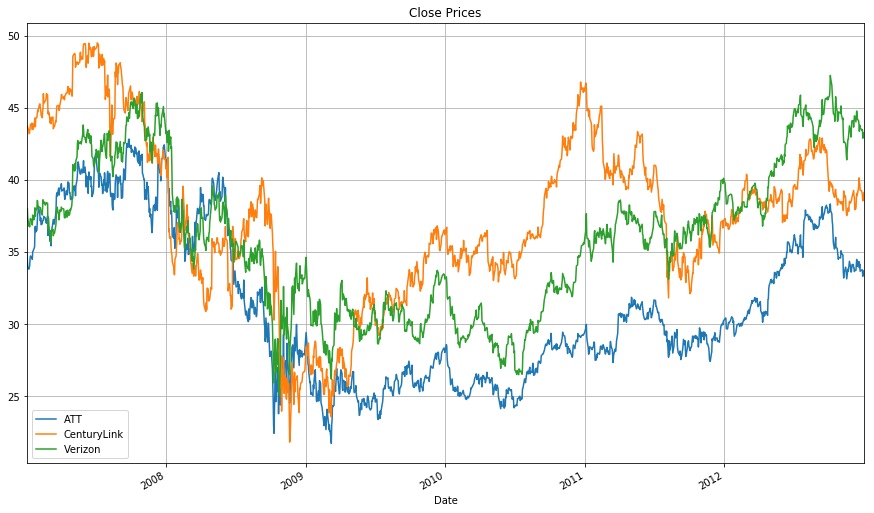

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (15,9)
stocks.plot(grid=True,title='Close Prices')

In [97]:
dataPCh = stocks.pct_change()

In [99]:
log_returns = np.log(1+dataPCh)
print(log_returns.head(10))

                 ATT  CenturyLink   Verizon
Date                                       
2007-01-03       NaN          NaN       NaN
2007-01-04 -0.012959    -0.000686  0.005537
2007-01-05 -0.015776    -0.001145 -0.017240
2007-01-08 -0.004427    -0.005744 -0.015366
2007-01-09  0.003838    -0.004387  0.004067
2007-01-10  0.002648     0.002542 -0.005698
2007-01-11  0.013427     0.005984  0.009748
2007-01-12  0.006934     0.005720  0.005911
2007-01-16 -0.002884     0.002734 -0.004564
2007-01-17 -0.004051    -0.010292 -0.007564


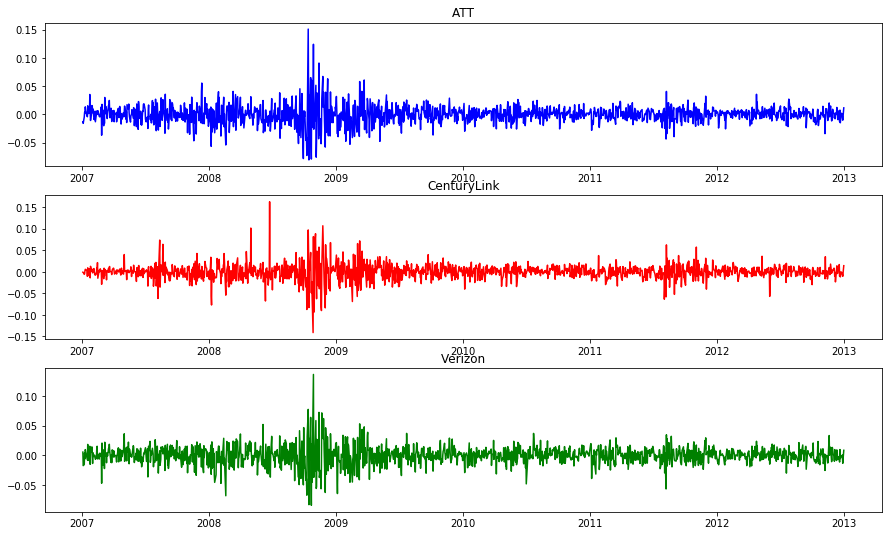

In [112]:
fig, ax = plt.subplots(nrows = 3, ncols = 1)
for row,i,color in zip(ax,log_returns.columns,['b','red','g']):
    row.plot(log_returns[i],color)
    row.set_title(i)
    

#### Let's list down our formulas
[Wiki](https://en.wikipedia.org/wiki/Sharpe_ratio)

The Sharpe ratio characterizes how well the return of an asset compensates the investor for the risk taken. When comparing two assets versus a common benchmark, the one with a higher Sharpe ratio provides better return for the same risk (or, equivalently, the same return for lower risk). However, like any other mathematical model, it relies on the data being correct. Ponzi schemes with a long duration of operation would typically provide a high Sharpe ratio when derived from reported returns, but the inputs are false. When examining the investment performance of assets with smoothing of returns (such as with-profits funds) the Sharpe ratio should be derived from the performance of the underlying assets rather than the fund returns.
* $Sharpe = \frac{E[R_a - R_b]}{\sigma_a}$
* $R_a = $  